In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle
import os


In [ ]:
# carregando modelos e métricas
# rode svm.ipynb, QDA.ipynb, passo1.ipynb, and logistic.ipynb antes

print("Loading saved models and metrics...")

with open('models/svm_metrics.pkl', 'rb') as f:
    svm_metrics = pickle.load(f)
svm_predictions = svm_metrics['predictions']
y_test_svm = np.load('models/svm_y_test.npy')

with open('models/qda_metrics.pkl', 'rb') as f:
    qda_metrics = pickle.load(f)
qda_predictions = qda_metrics['predictions']
y_test_qda = np.load('models/qda_y_test.npy')


with open('models/lda_metrics.pkl', 'rb') as f:
    lda_metrics = pickle.load(f)
lda_predictions = lda_metrics['predictions']
y_test_lda = np.load('models/lda_y_test.npy')


with open('models/logistic_metrics.pkl', 'rb') as f:
    logistic_metrics = pickle.load(f)
logistic_predictions = logistic_metrics['predictions']
y_test_logistic = np.load('models/logistic_y_test.npy')


y_test = y_test_lda

print("All models and metrics loaded successfully!")
print(f"\nTest set size: {len(y_test)}")
print(f"SVM predictions shape: {svm_predictions.shape}")
print(f"QDA predictions shape: {qda_predictions.shape}")
print(f"LDA predictions shape: {lda_predictions.shape}")
print(f"Logistic predictions shape: {logistic_predictions.shape}")


Loading saved models and metrics...
All models and metrics loaded successfully!

Test set size: 1300
SVM predictions shape: (1300,)
QDA predictions shape: (1300,)
LDA predictions shape: (1300,)
Logistic predictions shape: (1300,)


In [5]:

# mostrar métricas carregadas

print("SVM (Linear) Metrics:")
print(f"  Accuracy:  {svm_metrics['accuracy']:.6f}")
print(f"  Precision: {svm_metrics['precision']:.6f}")
print(f"  Recall:    {svm_metrics['recall']:.6f}")

print("\nQDA (Nonlinear) Metrics:")
print(f"  Accuracy:  {qda_metrics['accuracy']:.6f}")
print(f"  Precision: {qda_metrics['precision']:.6f}")
print(f"  Recall:    {qda_metrics['recall']:.6f}")
print(f"  F1-Score:  {qda_metrics['f1_score']:.6f}")

print("\nLDA (Linear with shared covariance) Metrics:")
print(f"  Accuracy:  {lda_metrics['accuracy']:.6f}")
print(f"  Precision: {lda_metrics['precision']:.6f}")
print(f"  Recall:    {lda_metrics['recall']:.6f}")
print(f"  F1-Score:  {lda_metrics['f1_score']:.6f}")

print("\nLogistic Regression Metrics:")
print(f"  Accuracy:  {logistic_metrics['accuracy']:.6f}")
print(f"  Precision: {logistic_metrics['precision']:.6f}")
print(f"  Recall:    {logistic_metrics['recall']:.6f}")
print(f"  F1-Score:  {logistic_metrics['f1_score']:.6f}")


SVM (Linear) Metrics:
  Accuracy:  0.994615
  Precision: 0.985915
  Recall:    0.989399

QDA (Nonlinear) Metrics:
  Accuracy:  0.986923
  Precision: 0.949324
  Recall:    0.992933
  F1-Score:  0.970639

LDA (Linear with shared covariance) Metrics:
  Accuracy:  0.996154
  Precision: 0.998031
  Recall:    0.997050
  F1-Score:  0.997541

Logistic Regression Metrics:
  Accuracy:  0.985385
  Precision: 0.998004
  Recall:    0.983284
  F1-Score:  0.990589


In [6]:
# comparação entre os modelos
comparison_data = {
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'SVM (Linear)': [
        f"{svm_metrics['accuracy']:.6f}",
        f"{svm_metrics['precision']:.6f}",
        f"{svm_metrics['recall']:.6f}",
        f"{svm_metrics['f1_score']:.6f}"
    ],
    'LDA (Linear Shared Cov)': [
        f"{lda_metrics['accuracy']:.6f}",
        f"{lda_metrics['precision']:.6f}",
        f"{lda_metrics['recall']:.6f}",
        f"{lda_metrics['f1_score']:.6f}"
    ],
    'QDA (Nonlinear)': [
        f"{qda_metrics['accuracy']:.6f}",
        f"{qda_metrics['precision']:.6f}",
        f"{qda_metrics['recall']:.6f}",
        f"{qda_metrics['f1_score']:.6f}"
    ],
    'Logistic Regression': [
        f"{logistic_metrics['accuracy']:.6f}",
        f"{logistic_metrics['precision']:.6f}",
        f"{logistic_metrics['recall']:.6f}",
        f"{logistic_metrics['f1_score']:.6f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*100)
print("COMPARAÇÃO DE MÉTRICAS: SVM vs LDA vs QDA vs Logistic Regression")
print("="*100)
print(comparison_df.to_string(index=False))
print("="*100)



COMPARAÇÃO DE MÉTRICAS: SVM vs LDA vs QDA vs Logistic Regression
  Métrica SVM (Linear) LDA (Linear Shared Cov) QDA (Nonlinear) Logistic Regression
 Accuracy     0.994615                0.996154        0.986923            0.985385
Precision     0.985915                0.998031        0.949324            0.998004
   Recall     0.989399                0.997050        0.992933            0.983284
 F1-Score     0.987654                0.997541        0.970639            0.990589


In [7]:
# matriz de confusão
confusion_data = {
    'Métrica': ['True Negative (TN)', 'False Positive (FP)', 
                'False Negative (FN)', 'True Positive (TP)'],
    'SVM (Linear)': [
        svm_metrics['TN'],
        svm_metrics['FP'],
        svm_metrics['FN'],
        svm_metrics['TP']
    ],
    'LDA (Linear Shared Cov)': [
        lda_metrics['TN'],
        lda_metrics['FP'],
        lda_metrics['FN'],
        lda_metrics['TP']
    ],
    'QDA (Nonlinear)': [
        qda_metrics['TN'],
        qda_metrics['FP'],
        qda_metrics['FN'],
        qda_metrics['TP']
    ],
    'Logistic Regression': [
        logistic_metrics['TN'],
        logistic_metrics['FP'],
        logistic_metrics['FN'],
        logistic_metrics['TP']
    ]
}

confusion_df = pd.DataFrame(confusion_data)
print("\n" + "="*100)
print("MATRIZ DE CONFUSÃO: SVM vs LDA vs QDA vs Logistic Regression")
print("="*100)
print(confusion_df.to_string(index=False))
print("="*100)



MATRIZ DE CONFUSÃO: SVM vs LDA vs QDA vs Logistic Regression
            Métrica  SVM (Linear)  LDA (Linear Shared Cov)  QDA (Nonlinear)  Logistic Regression
 True Negative (TN)          1013                      281             1002                  281
False Positive (FP)             4                        2               15                    2
False Negative (FN)             3                        3                2                   17
 True Positive (TP)           280                     1014              281                 1000


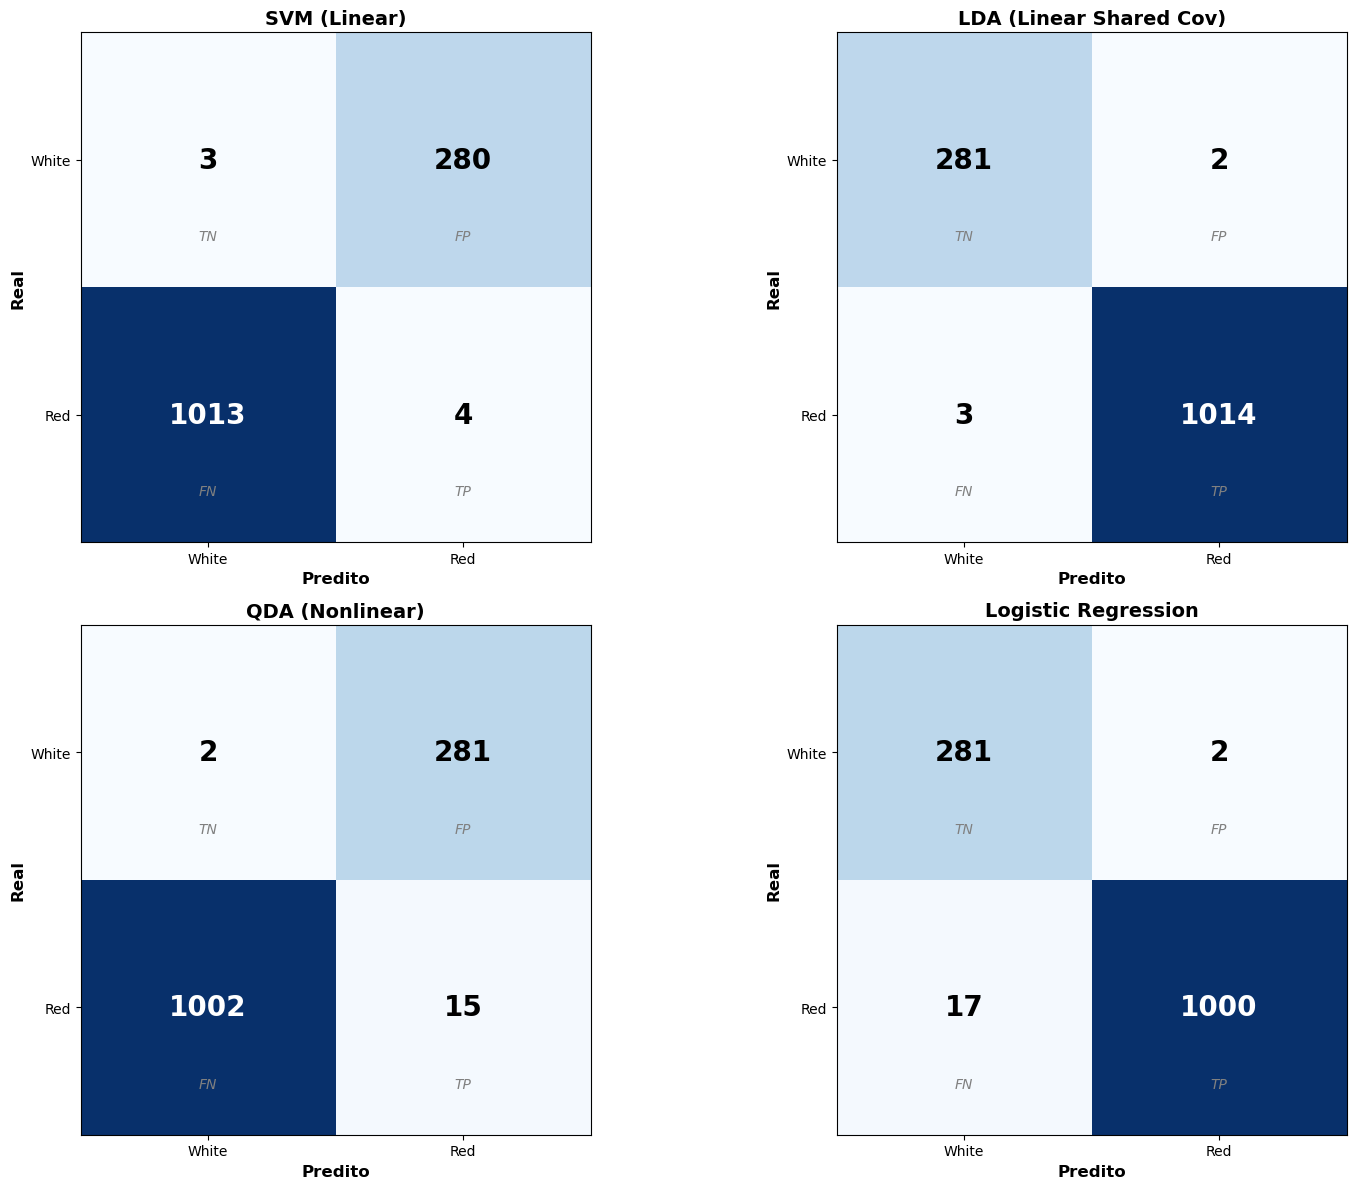

In [8]:
# Comparando as matrizes de confusão
def plot_confusion_matrix(y_true, y_pred, ax, title, class_names=['White', 'Red']):
  
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    TP = np.sum((y_true == 1) & (y_pred == 1))
    
    matrix = np.array([[TN, FP], [FN, TP]])
    
    im = ax.imshow(matrix, cmap='Blues', interpolation='nearest')
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    ax.set_xlabel('Predito', fontsize=12, fontweight='bold')
    ax.set_ylabel('Real', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')
    
  
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, matrix[i, j],
                          ha="center", va="center", 
                          color="white" if matrix[i, j] > matrix.max()/2 else "black",
                          fontsize=20, fontweight='bold')

    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i+0.3, labels[i][j],
                          ha="center", va="center", color="gray",
                          fontsize=10, style='italic')


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

plot_confusion_matrix(y_test, svm_predictions, ax1, 
                      'SVM (Linear)', class_names=['White', 'Red'])
plot_confusion_matrix(y_test, lda_predictions, ax2, 
                      'LDA (Linear Shared Cov)', class_names=['White', 'Red'])
plot_confusion_matrix(y_test, qda_predictions, ax3, 
                      'QDA (Nonlinear)', class_names=['White', 'Red'])
plot_confusion_matrix(y_test, logistic_predictions, ax4, 
                      'Logistic Regression', class_names=['White', 'Red'])

plt.tight_layout()
plt.show()


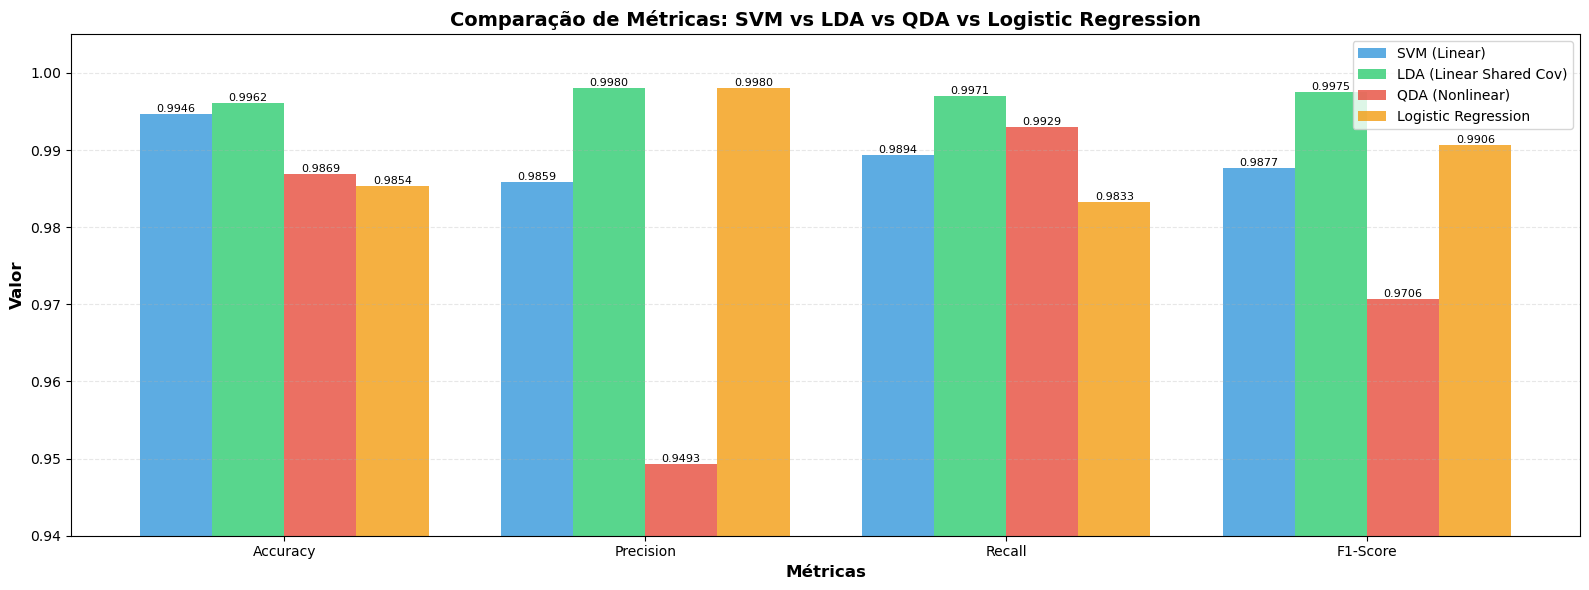

In [9]:
# Bar chart comparing metrics
fig, ax = plt.subplots(figsize=(16, 6))

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
svm_values = [
    svm_metrics['accuracy'],
    svm_metrics['precision'],
    svm_metrics['recall'],
    svm_metrics['f1_score']
]
lda_values = [
    lda_metrics['accuracy'],
    lda_metrics['precision'],
    lda_metrics['recall'],
    lda_metrics['f1_score']
]
qda_values = [
    qda_metrics['accuracy'],
    qda_metrics['precision'],
    qda_metrics['recall'],
    qda_metrics['f1_score']
]
logistic_values = [
    logistic_metrics['accuracy'],
    logistic_metrics['precision'],
    logistic_metrics['recall'],
    logistic_metrics['f1_score']
]

x = np.arange(len(metric_names))
width = 0.2

bars1 = ax.bar(x - 1.5*width, svm_values, width, label='SVM (Linear)', color='#3498db', alpha=0.8)
bars2 = ax.bar(x - 0.5*width, lda_values, width, label='LDA (Linear Shared Cov)', color='#2ecc71', alpha=0.8)
bars3 = ax.bar(x + 0.5*width, qda_values, width, label='QDA (Nonlinear)', color='#e74c3c', alpha=0.8)
bars4 = ax.bar(x + 1.5*width, logistic_values, width, label='Logistic Regression', color='#f39c12', alpha=0.8)

ax.set_xlabel('Métricas', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor', fontsize=12, fontweight='bold')
ax.set_title('Comparação de Métricas: SVM vs LDA vs QDA vs Logistic Regression', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend(fontsize=10)
ax.set_ylim([0.94, 1.005])
ax.grid(axis='y', alpha=0.3, linestyle='--')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [10]:
def get_best_model(metric_name, svm_val, lda_val, qda_val, logistic_val):
    """Determine which model performs best for a given metric"""
    values = {'SVM': svm_val, 'LDA': lda_val, 'QDA': qda_val, 'Logistic': logistic_val}
    return max(values, key=values.get)

detailed_comparison = {
    'Métrica': ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)',
                'True Negative', 'False Positive', 'False Negative', 'True Positive'],
    'SVM (Linear)': [
        f"{svm_metrics['accuracy']*100:.4f}",
        f"{svm_metrics['precision']*100:.4f}",
        f"{svm_metrics['recall']*100:.4f}",
        f"{svm_metrics['f1_score']*100:.4f}",
        f"{svm_metrics['TN']}",
        f"{svm_metrics['FP']}",
        f"{svm_metrics['FN']}",
        f"{svm_metrics['TP']}"
    ],
    'LDA (Linear Shared Cov)': [
        f"{lda_metrics['accuracy']*100:.4f}",
        f"{lda_metrics['precision']*100:.4f}",
        f"{lda_metrics['recall']*100:.4f}",
        f"{lda_metrics['f1_score']*100:.4f}",
        f"{lda_metrics['TN']}",
        f"{lda_metrics['FP']}",
        f"{lda_metrics['FN']}",
        f"{lda_metrics['TP']}"
    ],
    'QDA (Nonlinear)': [
        f"{qda_metrics['accuracy']*100:.4f}",
        f"{qda_metrics['precision']*100:.4f}",
        f"{qda_metrics['recall']*100:.4f}",
        f"{qda_metrics['f1_score']*100:.4f}",
        f"{qda_metrics['TN']}",
        f"{qda_metrics['FP']}",
        f"{qda_metrics['FN']}",
        f"{qda_metrics['TP']}"
    ],
    'Logistic Regression': [
        f"{logistic_metrics['accuracy']*100:.4f}",
        f"{logistic_metrics['precision']*100:.4f}",
        f"{logistic_metrics['recall']*100:.4f}",
        f"{logistic_metrics['f1_score']*100:.4f}",
        f"{logistic_metrics['TN']}",
        f"{logistic_metrics['FP']}",
        f"{logistic_metrics['FN']}",
        f"{logistic_metrics['TP']}"
    ],
    'Melhor': [
        get_best_model('accuracy', svm_metrics['accuracy'], lda_metrics['accuracy'], qda_metrics['accuracy'], logistic_metrics['accuracy']),
        get_best_model('precision', svm_metrics['precision'], lda_metrics['precision'], qda_metrics['precision'], logistic_metrics['precision']),
        get_best_model('recall', svm_metrics['recall'], lda_metrics['recall'], qda_metrics['recall'], logistic_metrics['recall']),
        get_best_model('f1', svm_metrics['f1_score'], lda_metrics['f1_score'], qda_metrics['f1_score'], logistic_metrics['f1_score']),
        get_best_model('TN', svm_metrics['TN'], lda_metrics['TN'], qda_metrics['TN'], logistic_metrics['TN']),
        get_best_model('FP', -svm_metrics['FP'], -lda_metrics['FP'], -qda_metrics['FP'], -logistic_metrics['FP']),  # Lower is better
        get_best_model('FN', -svm_metrics['FN'], -lda_metrics['FN'], -qda_metrics['FN'], -logistic_metrics['FN']),  # Lower is better
        get_best_model('TP', svm_metrics['TP'], lda_metrics['TP'], qda_metrics['TP'], logistic_metrics['TP'])
    ]
}

detailed_df = pd.DataFrame(detailed_comparison)
print("\n" + "="*120)
print("TABELA DETALHADA DE COMPARAÇÃO: SVM vs LDA vs QDA vs Logistic Regression")
print("="*120)
print(detailed_df.to_string(index=False))
print("="*120)



TABELA DETALHADA DE COMPARAÇÃO: SVM vs LDA vs QDA vs Logistic Regression
       Métrica SVM (Linear) LDA (Linear Shared Cov) QDA (Nonlinear) Logistic Regression Melhor
  Accuracy (%)      99.4615                 99.6154         98.6923             98.5385    LDA
 Precision (%)      98.5915                 99.8031         94.9324             99.8004    LDA
    Recall (%)      98.9399                 99.7050         99.2933             98.3284    LDA
  F1-Score (%)      98.7654                 99.7541         97.0639             99.0589    LDA
 True Negative         1013                     281            1002                 281    SVM
False Positive            4                       2              15                   2    LDA
False Negative            3                       3               2                  17    QDA
 True Positive          280                    1014             281                1000    LDA
